In [ ]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/sample_data/sonar_csv.csv')

In [ ]:
df

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler()

In [ ]:
trans=scaler.transform(df.drop('Class',axis=1))

In [ ]:
trans

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]])

In [ ]:
new=pd.DataFrame(trans,columns=df.columns[:-1])

In [ ]:
new

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,attribute_11,attribute_12,attribute_13,attribute_14,attribute_15,attribute_16,attribute_17,attribute_18,attribute_19,attribute_20,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30,attribute_31,attribute_32,attribute_33,attribute_34,attribute_35,attribute_36,attribute_37,attribute_38,attribute_39,attribute_40,attribute_41,attribute_42,attribute_43,attribute_44,attribute_45,attribute_46,attribute_47,attribute_48,attribute_49,attribute_50,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
0,-0.399551,-0.040648,-0.026926,-0.715105,0.364456,-0.101253,0.521638,0.297843,1.125272,0.021186,-0.567382,-0.658541,-0.352043,-1.414373,-1.240416,-0.651413,-0.402913,-0.584202,0.011612,-0.318092,-0.119597,-0.459029,-0.858165,-0.493225,-0.017695,-0.246629,0.033645,0.481687,0.154486,-0.886521,-1.750890,-0.839777,0.460548,1.523579,1.783805,1.768039,1.276008,1.271024,0.848461,-0.206511,-1.395741,0.030339,0.259328,1.590771,0.442062,-0.164885,-0.200048,0.688588,-0.379978,0.878510,0.595283,-1.115432,-0.597604,0.680897,-0.295646,1.481635,1.763784,0.069870,0.171678,-0.658947
1,0.703538,0.421630,1.055618,0.323330,0.777676,2.607217,1.522625,2.510982,1.318325,0.588706,1.932142,2.898195,2.976719,2.944515,2.079703,2.438336,2.220238,1.667619,1.156279,0.834871,-0.341605,-0.858218,-1.006818,-1.179062,-1.434182,-1.605136,-1.530425,-1.763702,-0.833533,-1.717061,-0.588706,-0.678535,-1.062150,-0.733178,-1.013395,0.126582,0.082283,-1.101179,-0.714012,-0.640777,-0.713840,-1.306977,-0.767653,-0.385613,-0.893356,-1.050261,-0.800670,-0.276618,-0.307489,-1.050756,-0.297902,-0.522349,-0.256857,-0.843151,0.015503,1.901046,1.070732,-0.472406,-0.444554,-0.419852
2,-0.129229,0.601067,1.723404,1.172176,0.400545,2.093337,1.968770,2.852370,3.232767,3.066105,3.000992,3.261740,1.998926,1.434872,1.599057,1.355566,0.988117,1.160528,1.507916,1.140572,0.732277,0.193621,-0.872189,-1.290573,-0.582489,-1.937685,-0.796337,0.673135,-0.160528,1.228201,1.624174,0.307721,-1.121368,-0.573653,0.118483,-0.305701,1.035341,1.581199,1.065989,0.901598,1.027820,-0.116403,-0.242623,0.061104,0.091680,-1.070468,0.142341,-0.273406,-1.085353,-0.720654,-1.065875,1.017585,0.836373,-0.197833,1.231812,2.827246,4.120162,1.309360,0.252761,0.257582
3,-0.835555,-0.648910,0.481740,-0.719414,-0.987079,-1.149364,-0.193816,-0.084747,-1.000852,-0.610469,-1.117292,-0.365128,-1.812688,-0.429479,-0.718781,-0.712596,-1.317974,-0.859403,-0.383932,-0.632571,-1.302345,-1.000030,-0.366125,-0.788353,-1.479201,-0.703408,-0.720439,-1.868090,-1.806948,-1.021841,0.569262,1.386586,0.945462,-0.232062,0.010556,-0.317466,0.739521,2.549849,3.322838,3.397228,1.891327,1.320721,0.536988,0.798111,1.535517,1.532522,1.649083,1.062786,0.450859,0.658442,0.670411,-0.137365,-1.009341,0.557326,-0.111785,-0.161060,-0.488635,-0.549875,-0.639154,1.034640
4,2.050790,0.856537,0.111327,-0.312227,-0.292365,-0.672796,-0.013735,1.317299,1.510531,1.772220,1.353527,1.037528,1.083001,0.712657,0.647036,0.664024,1.196069,0.640022,-1.171910,-0.379537,-0.755295,-0.764199,-0.296406,-0.556527,-1.470607,-1.991772,-0.010833,1.293121,0.351005,-0.492820,0.027284,0.502340,-0.626746,-1.322726,-0.763886,0.126202,0.403590,-0.084520,-0.216518,-0.382686,-0.535163,-0.201359,-0.446000,-0.977475,-0.846418,-0.807026,-1.000109,-1.331760,-0.806549,-1.160790,-0.039129,-1.073812,-0.753780,-0.060532,0.241793,-1.174638,-0.107456,-0.487900,0.447361,0.576375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-0.456232,-0.116681,-0.705146,-0.779738,-0.647842,0.990954,1.314965,0.407323,0.463980,0.448504,0.564920,0.3082

In [ ]:
from sklearn.model_selection import train_test_split
x=new
y=df['Class']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[32  3]
 [ 2 26]]
              precision    recall  f1-score   support

        Mine       0.94      0.91      0.93        35
        Rock       0.90      0.93      0.91        28

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63



In [ ]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

ValueError: ignored

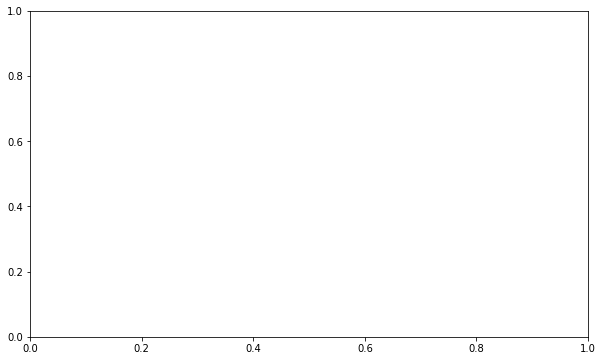

In [ ]:
from matplotlib import markers
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='s',markerfacecolor='orange',markersize=10)
plt.title('error rate vs k values')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as s
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/sample_data/citrus.csv')

In [ ]:
df

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9
...,...,...,...,...,...,...
9995,grapefruit,15.35,253.89,149,77,20
9996,grapefruit,15.41,254.67,148,68,7
9997,grapefruit,15.59,256.50,168,82,20
9998,grapefruit,15.92,260.14,142,72,11


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('name',axis=1))

StandardScaler()

In [ ]:
trans=scaler.transform(df.drop('name',axis=1))

In [ ]:
trans

array([[-3.60195018, -3.02255396,  1.73997781,  0.76780981, -1.03337209],
       [-3.11420697, -2.978392  ,  1.16484825,  0.16992022, -0.92300682],
       [-2.85236589, -2.73464536,  0.20629897,  0.42615862, -1.03337209],
       ...,
       [ 2.88246734,  2.78833864,  1.3565581 ,  0.51157142,  0.95320276],
       [ 3.05189393,  2.91295068, -1.13567001, -0.34255657, -0.04008467],
       [ 3.32400329,  2.95985137, -0.17712073, -0.17173097, -1.03337209]])

In [ ]:
new=pd.DataFrame(trans,columns=df.columns[1:])

In [ ]:
new

,diameter,weight,red,green,blue
0,-3.601950,-3.022554,1.739978,0.767810,-1.033372
1,-3.114207,-2.978392,1.164848,0.169920,-0.923007
2,-2.852366,-2.734645,0.206299,0.426159,-1.033372
3,-2.826695,-2.719925,0.877283,0.426159,-0.812642
4,-2.821561,-2.714447,0.685574,-0.342557,-0.260815
...,...,...,...,...,...
9995,2.759248,2.698988,-0.464686,0.084507,0.953203
9996,2.790053,2.725690,-0.560540,-0.684208,-0.481546
9997,2.882467,2.788339,1.356558,0.511571,0.953203
9998,3.051894,2.912951,-1.135670,-0.342557,-0.040085


In [ ]:
from sklearn.model_selection import train_test_split
x=new
y=df['name']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=55)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1378  124]
 [ 111 1387]]
              precision    recall  f1-score   support

  grapefruit       0.93      0.92      0.92      1502
      orange       0.92      0.93      0.92      1498

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [ ]:
error_rate=[]

In [ ]:
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i=knn.predict(x_test)
  error_rate.append(np.mean(pred_i !=y_test))

In [ ]:
from matplotlib import markers


ValueError: ignored

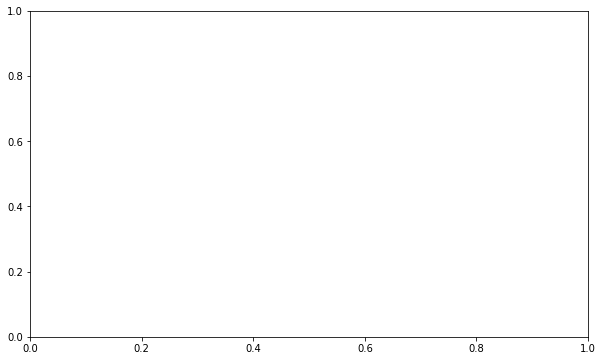

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue',linestyle='dashed',marker='s',markerfacecolor='orange',markersize=10)
plt.title('error rate vs k values')
plt.xlabel('k')
plt.ylabel('Error Rate')